In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets

In [2]:
(x_train,y_train),(x_test,y_test)= datasets.mnist.load_data()

In [3]:
x_test.shape

(10000, 28, 28)

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_train=x_train/255
x_test=x_test/255

In [8]:
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)

In [9]:
cnn=keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[28,28,1]),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
     keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'),
    keras.layers.MaxPooling2D(pool_size=2,strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(10,activation='softmax')
])
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
cnn.fit(x_train,y_train,epochs=2,batch_size=512)

Epoch 1/2
118/118 [==============================] - 14s 119ms/step - loss: 0.4906 - accuracy: 0.8643
Epoch 2/2
118/118 [==============================] - 14s 119ms/step - loss: 0.1074 - accuracy: 0.9679


In [10]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0768 - accuracy: 0.9764


[0.07682903856039047, 0.9764000177383423]

In [12]:
y_pred=[]
pred=cnn.predict(x_test)
for element in pred:
    y_pred.append(np.argmax(element))

In [18]:
y_pred=np.array(y_pred)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [14]:
y_test


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [21]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[ 973,    0,    0,    0,    0,    2,    1,    1,    3,    0],
       [   0, 1129,    1,    2,    0,    0,    1,    1,    1,    0],
       [   6,    6,  995,    5,    3,    1,    0,    9,    6,    1],
       [   0,    0,    1,  995,    0,    4,    0,    6,    3,    1],
       [   1,    1,    2,    0,  968,    0,    2,    1,    2,    5],
       [   1,    0,    0,    5,    1,  880,    2,    1,    1,    1],
       [  11,    4,    0,    1,    5,   13,  923,    0,    1,    0],
       [   1,    5,   12,    3,    0,    0,    0,  996,    2,    9],
       [   8,    0,    2,   11,    3,    7,    0,    7,  927,    9],
       [   4,    8,    0,    4,    6,    5,    0,    4,    0,  978]],
      dtype=int64)

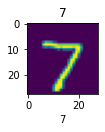

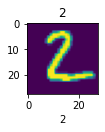

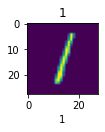

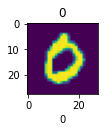

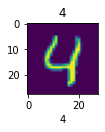

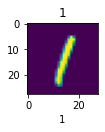

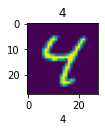

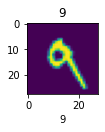

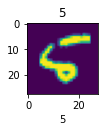

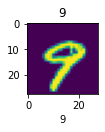

In [30]:
for i in range(0,10):
    plt.figure(figsize=(15,10))
    plt.subplot(1,10,i+1)
    plt.imshow(x_test[i])
    plt.xlabel(y_pred[i])
    plt.title(y_test[i])

In [38]:
actual=y_test
predicted=y_pred
final=pd.DataFrame({'Actual' :actual,'Predicted':predicted})
final.head(20)

,Actual,Predicted
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9


## Thank You !!